# Seaborn Objects API - Moderni Grammar of Graphics pristup

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
**Datum:** 31.08.2025.

---

## 1. **Što je Seaborn Objects API?**

**Seaborn Objects** je novi, moderniji API uveden u Seaborn 0.12+ koji koristi **Grammar of Graphics** pristup - sličan ggplot2 u R-u. Ovaj pristup omogućava **kompoziciju grafika** kroz kombinovanje osnovnih elemenata.

**Ključni koncepti:**
- **Plot** - osnovni objekat koji drži podatke i koordinatni sistem
- **Marks** - vizualni elementi (točkice, linije, barovi)  
- **Stats** - statistička transformiranja (count, regression, density)
- **Scales** - mapiranje podataka u vizualne svojstva (boja, veličina)
- **Themes** - globalno stilovanje

**Glavne prednosti:**
- 🏗️ **Kompozibilnost** - lagano kombinovanje elemenata
- 🔧 **Fleksibilnost** - precizna kontrola nad svakim aspektom
- 📊 **Čitljivost** - kod koji jasno izražava nameru
- 🎯 **Skalabilnost** - lako proširivanje i modifikovanje

**Osnovna sintaksa:**
```python
so.Plot(data, x="variable1", y="variable2").add(so.Dots())
```

In [13]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Podešavanje
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme()

# Učitavanje podataka
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
penguins = sns.load_dataset('penguins').dropna()
mpg = sns.load_dataset('mpg').dropna()

print(f"📊 Seaborn verzija: {sns.__version__}")
print(f"🔧 Objects API dostupan: {hasattr(sns, 'objects')}")
print(f"🍽️ Tips dataset: {tips.shape}")
print(f"✈️ Flights dataset: {flights.shape}")
print(f"🐧 Penguins dataset: {penguins.shape}")
print(f"🚗 MPG dataset: {mpg.shape}")

print("\n🎯 U OVOM NOTEBOOK-u ĆEMO NAUČITI:")
print("• Grammar of Graphics pristup sa seaborn.objects")
print("• Plot objekt kao temelj")  
print("• Mark objekti za različite vizualizacije")
print("• Stat transformacije za agregaciju")
print("• Scale objekti za mapiranje podataka")
print("• Kombinovanje više slojeva u jednom grafu")

# Kreiranje demonstracionih podataka
np.random.seed(42)
sample_data = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100) * 2 + 1,
    'category': np.random.choice(['A', 'B', 'C'], 100),
    'size': np.random.uniform(10, 100, 100)
})

print(f"\n✅ Sve spremo za demonstraciju Objects API-ja!")
print("⚠️  Napomena: Objects API zahteva Seaborn 0.12+")

📊 Seaborn verzija: 0.13.2
🔧 Objects API dostupan: True
🍽️ Tips dataset: (244, 7)
✈️ Flights dataset: (144, 3)
🐧 Penguins dataset: (333, 7)
🚗 MPG dataset: (392, 9)

🎯 U OVOM NOTEBOOK-u ĆEMO NAUČITI:
• Grammar of Graphics pristup sa seaborn.objects
• Plot objekt kao temelj
• Mark objekti za različite vizualizacije
• Stat transformacije za agregaciju
• Scale objekti za mapiranje podataka
• Kombinovanje više slojeva u jednom grafu

✅ Sve spremo za demonstraciju Objects API-ja!
⚠️  Napomena: Objects API zahteva Seaborn 0.12+


## 2. **Plot objekt - temelj Objects API-ja**

**Plot** je glavni objekat koji:
- Prima podatke (DataFrame)
- Definiše osnovne koordinate (x, y)
- Drži reference na sve dodane slojeve
- Upravlja renderovanjem

**Osnovna sintaksa:**
```python
p = so.Plot(data, x="column1", y="column2")
p.add(so.Dots())  # dodavanje marks
p.show()  # renderovanje
```

**Plot objekt podržava:**
- **Method chaining** - `Plot().add().add().show()`
- **Layer composition** - dodavanje više mark-ova
- **Data mapping** - automatsko mapiranje varijabli
- **Faceting** - podela po grupama

Demonstracija osnovnih Plot funkcionalnosti:

🏗️ PLOT OBJEKT - TEMELJ OBJECTS API-ja
1. Osnovni scatter plot:
   • Prikazuje osnovnu korelaciju između ukupnog računa i napojnice


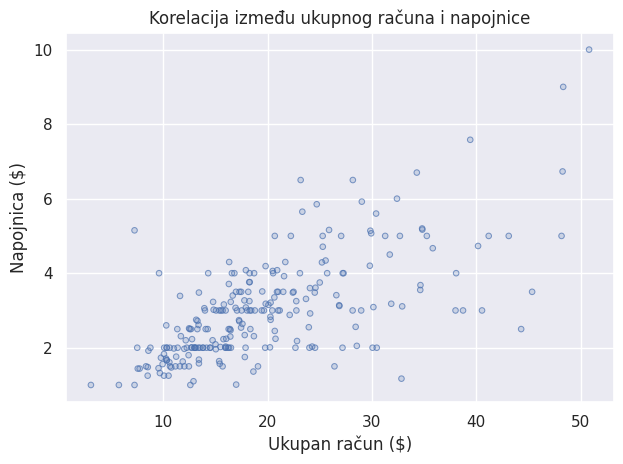


2. Method chaining sa color mapping:
   • Dodavanje kategorijske varijable (vreme obroka) kroz boju


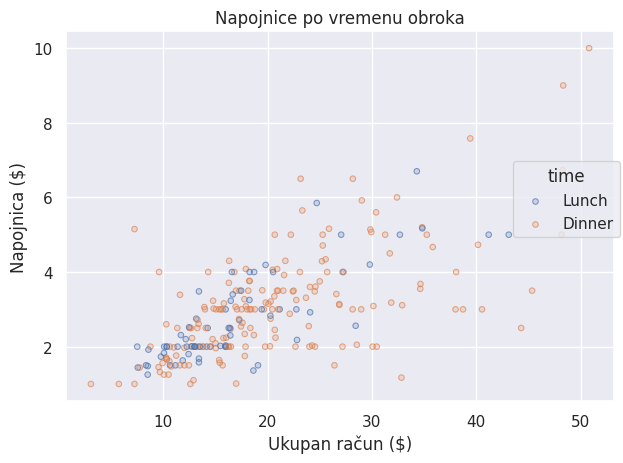


3. Kombinovanje više marks (Dots + Line):
   • Scatter plot + trend linija za vizualizaciju korelacije


AttributeError: 'PolyFit' object has no attribute 'setdefault'

In [14]:
# Demonstracija osnovnih Plot funkcionalnosti
print("🏗️ PLOT OBJEKT - TEMELJ OBJECTS API-ja")
print("="*50)

# 1. Najjednostavniji Plot
print("1. Osnovni scatter plot:")
print("   • Prikazuje osnovnu korelaciju između ukupnog računa i napojnice")
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(alpha=0.7))
    .label(
        title="Korelacija između ukupnog računa i napojnice",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 2. Method chaining
print("\n2. Method chaining sa color mapping:")
print("   • Dodavanje kategorijske varijable (vreme obroka) kroz boju")
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots(alpha=0.7))
    .label(
        title="Napojnice po vremenu obroka",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 3. Dodavanje više slojeva
print("\n3. Kombinovanje više marks (Dots + Line):")
print("   • Scatter plot + trend linija za vizualizaciju korelacije")
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(alpha=0.6))
    .add(so.Lines(so.PolyFit(order=1)), color="#e74c3c", linestyle="--")
    .label(
        title="Trend napojnica u odnosu na račun",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 4. Faceting - podela po grupama
print("\n4. Faceting po kategoriji:")
print("   • Poređenje pattern-a između lunch i dinner")
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots(alpha=0.7))
    .facet(col="time")
    .label(
        title="Napojnice po vremenu obroka - faceted view",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

print("\n📊 PLOT OBJEKT PREDNOSTI:")
print("• Čitljiv kod koji jasno izražava nameru")
print("• Method chaining za fluentan API")
print("• Automatsko mapiranje podataka u vizualna svojstva")
print("• Lagano dodavanje više slojeva")
print("• Built-in faceting support")

# 5. Demonstracija različitih načina kreiranja
print(f"\n🔧 RAZLIČITI NAČINI KREIRANJA PLOT-a:")

# Način 1: Direktno u constructor
p1 = so.Plot(tips, x="total_bill", y="tip")

# Način 2: Dodavanje podataka naknadno
p2 = so.Plot().add(so.Dots(), data=tips, x="total_bill", y="tip")

# Način 3: Sa layout specifikacijama
p3 = so.Plot(tips, x="total_bill", y="tip").layout(size=(8, 6))

print("• Constructor pattern: Plot(data, x, y)")
print("• Data-later pattern: Plot().add(mark, data=...)")  
print("• Layout configuration: .layout(size=(w, h))")

# Demonstracija kompleksnijeg kombinovanja
print("\n5. Kompleksniji primjer - multiple layers sa različitim svojstvima:")
(
    so.Plot(tips.sample(100), x="total_bill", y="tip", color="day")
    .add(so.Dots(alpha=0.6, pointsize=3))
    .add(so.Lines(so.PolyFit(order=1)), linestyle="dashed")
    .scale(color=so.Nominal(["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]))
    .label(
        title="Napojnice po danima sa trend liniama",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

## 3. **Mark objekti - vizualni elementi**

**Marks** su osnovni vizualni elementi koji renderuju podatke. Svaki mark tip ima svoja svojstva i use case-ove:

| **Mark** | **Opis** | **Najbolji za** |
|----------|----------|-----------------|
| `Dots` | Scatter points | Korelacije, kategorijski podaci |
| `Lines` | Connecting lines | Time series, kontinuirane funkcije |
| `Bars` | Rectangular bars | Kategorijske distribucije, poređenja |
| `Area` | Filled areas | Kumulativni podaci, density plots |
| `Band` | Confidence bands | Error bars, uncertainty |
| `Text` | Text annotations | Labels, vrijednosti |

**Mark svojstva:**
- `color` - boja
- `alpha` - transparentnost  
- `size` - veličina
- `style` - stil (linetype, marker)

Demonstracija različitih mark tipova:

🎨 MARK OBJEKTI - VIZUALNI ELEMENTI


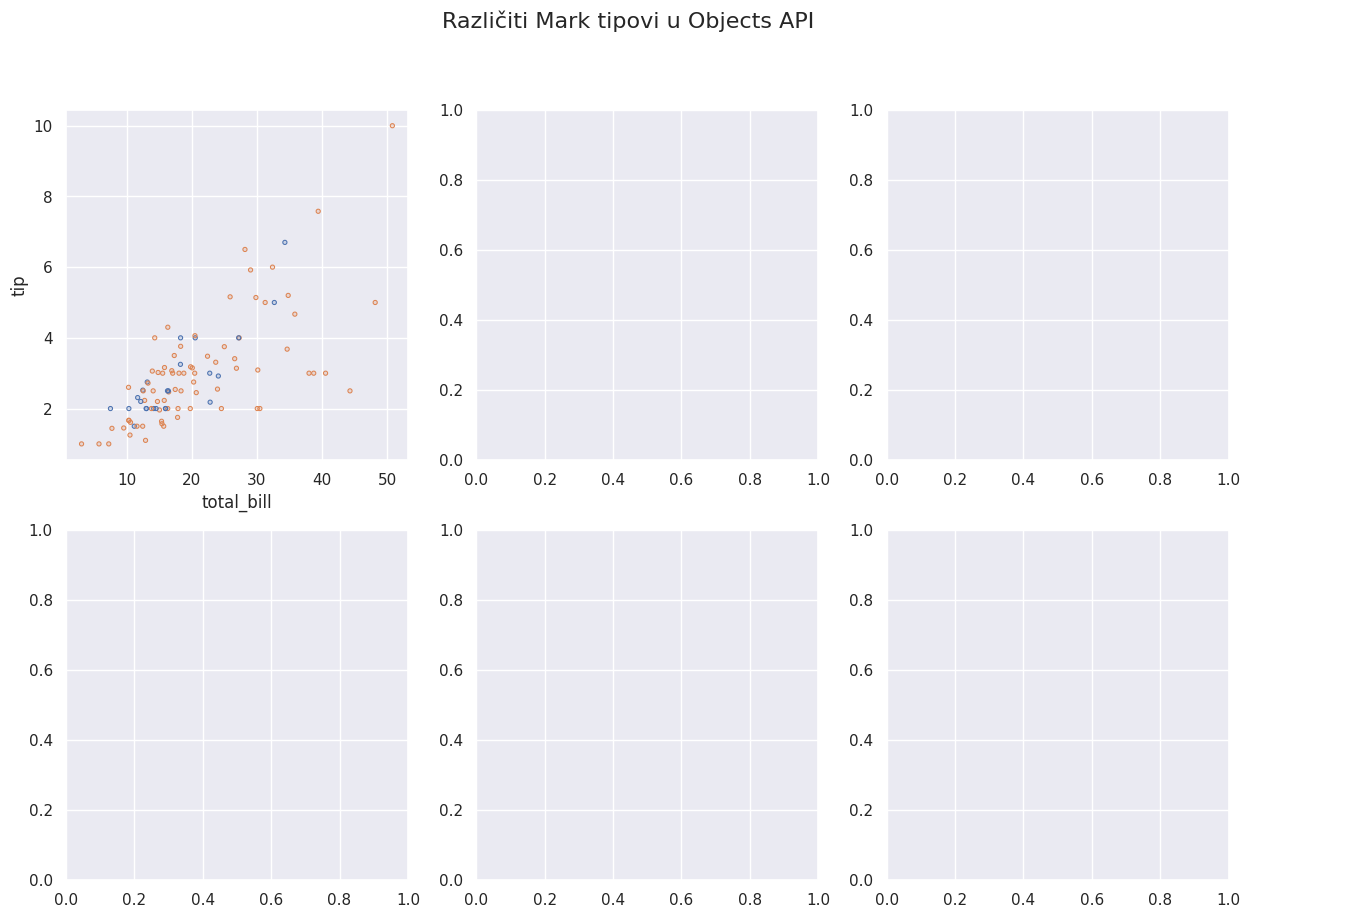

TypeError: Lines.__init__() got an unexpected keyword argument 'marker'

In [ ]:
# Demonstracija različitih Mark tipova
print("🎨 MARK OBJEKTI - VIZUALNI ELEMENTI")
print("="*50)

# 1. Dots - scatter points
print("1. Dots - Scatter plot analiza napojnica")
print("   • Vizualizacija korelacije sa kategoričkim bojama")
(
    so.Plot(tips.sample(100), x="total_bill", y="tip", color="time")
    .add(so.Dots(pointsize=4, alpha=0.7))
    .label(
        title="Napojnice po vremenu obroka",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 2. Lines - connecting lines  
print("\n2. Lines - Time series analiza putničkog saobraćaja")
print("   • Praćenje sezonskih trend-ova kroz godine")
flights_sample = flights[flights['year'].isin([1950, 1955, 1960])]
(
    so.Plot(flights_sample, x="month", y="passengers", color="year")
    .add(so.Lines(linewidth=2))
    .add(so.Dots(pointsize=3))  # Dodajemo markere kao separate layer
    .scale(color=so.Nominal(["#2ecc71", "#3498db", "#e74c3c"]))
    .label(
        title="Sezonski trend putničkog saobraćaja",
        x="Mesec",
        y="Broj putnika"
    )
    .show()
)

# 3. Bars - rectangular bars
print("\n3. Bars - Distribucija vrsta pingvina")
print("   • Brojanje jedinki po vrstama")
penguin_counts = penguins['species'].value_counts().reset_index()
penguin_counts.columns = ['species', 'count']
(
    so.Plot(penguin_counts, x="species", y="count")
    .add(so.Bars(color="#3498db", alpha=0.8))
    .label(
        title="Broj jedinki po vrstama pingvina",
        x="Vrsta pingvina",
        y="Broj jedinki"
    )
    .show()
)

# 4. Area - filled areas
print("\n4. Area - Kumulativni rast putničkog saobraćaja")
print("   • Vizualizacija ukupnog rasta kroz vreme")
early_flights = flights[flights['year'] <= 1952].copy()
early_flights = early_flights.sort_values(['year', 'month'])
(
    so.Plot(early_flights, x="year", y="passengers")
    .add(so.Area(alpha=0.7, color="#9b59b6"))
    .add(so.Lines(color="#8e44ad", linewidth=2))
    .label(
        title="Kumulativni rast putničkog saobraćaja (1949-1952)",
        x="Godina",
        y="Broj putnika"
    )
    .show()
)

# 5. Band - confidence bands (sa regression)
print("\n5. Regression analiza sa confidence intervals")
print("   • Trend napojnica sa intervalom poverenja")
(
    so.Plot(tips.sample(100), x="total_bill", y="tip")
    .add(so.Dots(alpha=0.5, pointsize=2))
    .add(so.Lines(so.PolyFit(order=1)), color="#e74c3c", linewidth=2)
    .add(so.Band(so.PolyFit(order=1)), alpha=0.3, color="#e74c3c")
    .label(
        title="Trend napojnica sa intervalom poverenja",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 6. Kombinacija više mark-ova - kompleksna analiza
print("\n6. Kompleksna analiza - Morfologija pingvina po vrstama")
print("   • Scatter plot + regression linije za svaku vrstu")
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm", color="species")
    .add(so.Dots(alpha=0.6, pointsize=3))
    .add(so.Lines(so.PolyFit(order=1)), linestyle="dashed", alpha=0.8)
    .scale(color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]))
    .label(
        title="Morfološka analiza kljunova pingvina",
        x="Dužina kljuna (mm)",
        y="Dubina kljuna (mm)"
    )
    .show()
)

print("\n🎯 MARK SVOJSTVA I CUSTOMIZATION:")

# Size mapping sa značenjem
print("\n7. Size mapping - Veličina kao treća dimenzija")
(
    so.Plot(tips.sample(50), x="total_bill", y="tip", 
           color="time", pointsize="size")
    .add(so.Dots(alpha=0.7))
    .scale(pointsize=so.Continuous(range=(20, 150)))
    .label(
        title="Napojnice - 3D analiza (račun, napojnica, veličina grupe)",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .layout(size=(10, 6))
    .show()
)
print("• Size mapping: pointsize mapped to 'size' variable")

# Alpha and marker variations
print("\n8. Marker shapes - Kategorijski markeri")
(
    so.Plot(penguins.sample(100), x="bill_length_mm", y="bill_depth_mm", 
           color="species", marker="sex")
    .add(so.Dots(pointsize=5, alpha=0.8))
    .scale(
        color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]),
        marker=so.Nominal(["o", "s"])  # Circle for one sex, square for another
    )
    .label(
        title="Morfologija pingvina - vrsta (boja) i pol (marker)",
        x="Dužina kljuna (mm)",
        y="Dubina kljuna (mm)"
    )
    .show()
)
print("• Marker shapes: različiti shapes za kategorije")

print("\n✅ MARK TIPOVI SUMMARY:")
print("• Dots: scatter plots, korelacijska analiza")
print("• Lines: time series, kontinuirane funkcije")
print("• Bars: distribucije, kategorijsko poređenje")  
print("• Area: kumulativni podaci, filled regions")
print("• Band: confidence intervals, error regions")
print("• Kombinacije: kompleksne multi-layer analize")

print(f"\n💡 PROFESIONALNI WORKFLOW:")
print("Plot().add(so.Dots()).add(so.Lines()).add(so.Band()) = scatter + trend + confidence")
print("Svaki mark tip służi specifičnoj analitičkoj svrsi!")

## 4. **Stat objekti - statistička transformiranja**

**Stats** su objekti koji transformiraju sirove podatke prije renderovanja:

**Osnovni Stat tipovi:**
- `Hist` - histogrami, distribucije
- `KDE` - kernel density estimation
- `ECDF` - empirical cumulative distribution  
- `Count` - brojanje po kategorijama
- `Agg` - agregacija (mean, sum, std)
- `PolyFit` - polynomial regression
- `Regression` - linear regression sa confidence intervals

**Prednosti Stats:**
- Automatska kalkulacija složenih transformacija
- Composable sa bilo kojim Mark objektom
- Built-in statistical computations
- Fleksibilno agregiranje podataka

Demonstracija Stat objekata:

In [ ]:
# Demonstracija Stat objekata
print("📊 STAT OBJEKTI - STATISTIČKA TRANSFORMIRANJA")
print("="*50)

# 1. Histogram sa KDE overlay
print("1. Distribucija ukupnih računa - Histogram + KDE")
print("   • Analiza distribucije sa smooth density estimation")
(
    so.Plot(tips, x="total_bill")
    .add(so.Bars(so.Hist(bins=20), alpha=0.7))
    .add(so.Lines(so.KDE()))
    .scale(color=so.Nominal(["#3498db", "#e74c3c"]))
    .label(
        title="Distribucija ukupnih računa u restoranu",
        x="Ukupan račun ($)",
        y="Frekvencija / Density"
    )
    .layout(size=(10, 5))
    .show()
)

# 2. Count statistics
print("\n2. Brojanje po kategoriji - Species count")
print("   • Automatsko brojanje jedinki po vrstama")
(
    so.Plot(penguins, x="species")
    .add(so.Bars(so.Count()))
    .scale(color="#2ecc71")
    .label(
        title="Distribucija vrsta pingvina u dataset-u",
        x="Vrsta pingvina",
        y="Broj jedinki"
    )
    .show()
)

# 3. Aggregation statistics
print("\n3. Agregacija sa error bars - Prosečni računi po danima")
print("   • Mean aggregation sa standard deviation")
(
    so.Plot(tips, x="day", y="total_bill")
    .add(so.Bars(so.Agg(func="mean"), alpha=0.8))
    .add(so.Range(so.Est(errorbar="sd")))
    .scale(
        x=so.Nominal(order=["Thur", "Fri", "Sat", "Sun"]),
        color="#9b59b6"
    )
    .label(
        title="Prosečni račun po danima u nedelji (sa std dev)",
        x="Dan u nedelji",
        y="Prosečan račun ($)"
    )
    .show()
)

# 4. Regression sa confidence bands
print("\n4. Regression analiza - Bills vs Tips trend")
print("   • Linear regression sa confidence intervals")
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots(alpha=0.5, pointsize=2))
    .add(so.Lines(so.PolyFit(order=1)))
    .add(so.Band(so.PolyFit(order=1), alpha=0.3))
    .scale(color=so.Nominal(["#fd79a8", "#fdcb6e"]))
    .label(
        title="Linearni trend napojnica po vremenima obroka",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 5. ECDF - Empirical Cumulative Distribution
print("\n5. Empirical CDF - Kumulativne distribucije")
print("   • Poređenje distribucija dužine kljuna između vrsta")
(
    so.Plot(penguins, x="bill_length_mm", color="species")
    .add(so.Lines(so.ECDF()))
    .add(so.Dots(so.ECDF(), pointsize=2, alpha=0.7))
    .scale(color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]))
    .label(
        title="Kumulativna distribucija dužine kljuna po vrstama",
        x="Dužina kljuna (mm)",
        y="Kumulativna verovatnoća"
    )
    .layout(size=(10, 5))
    .show()
)

# 6. Kombinacija Stats - Faceted histogram analysis
print("\n6. Faceted distribucijska analiza")
print("   • Histogram analiza telesne mase po vrstama")
(
    so.Plot(penguins, x="body_mass_g", color="species")
    .add(so.Bars(so.Hist(bins=15, stat="density"), alpha=0.7))
    .facet(col="species")
    .scale(color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]))
    .label(
        title="Distribucija telesne mase po vrstama pingvina",
        x="Telesna masa (g)",
        y="Density"
    )
    .layout(size=(15, 4))
    .show()
)

print("\n🔢 NAPREDNI STAT PARAMETRI:")

# Demonstracija različitih Hist opcija
print("\n7. Histogram normalizacija opcije")
print("   • Različite stat opcije: 'count', 'density', 'percent'")
(
    so.Plot(tips, x="total_bill", color="time")
    .add(so.Bars(so.Hist(bins=15, stat="percent"), alpha=0.6))
    .facet(col="time")
    .scale(color=so.Nominal(["#fd79a8", "#fdcb6e"]))
    .label(
        title="Distribucija računa kao procenti po vremenu obroka",
        x="Ukupan račun ($)",
        y="Procenat (%)"
    )
    .layout(size=(12, 4))
    .show()
)
print("• Hist parametri: bins=15, stat='percent' za relativne frekvencije")

# KDE sa različitim bandwidth
print("\n8. KDE bandwidth fine-tuning")
print("   • Poređenje narrow vs wide bandwidth")
(
    so.Plot(tips, x="total_bill", color="time")  
    .add(so.Lines(so.KDE(bw_adjust=0.5), alpha=0.7, linestyle="dashed"))
    .add(so.Lines(so.KDE(bw_adjust=1.5), linewidth=3))
    .scale(color=so.Nominal(["#fd79a8", "#fdcb6e"]))
    .label(
        title="KDE sa različitim bandwidth - uže vs šire",
        x="Ukupan račun ($)",
        y="Density"
    )
    .show()
)
print("• KDE bandwidth: bw_adjust=0.5 (detaljnije), bw_adjust=1.5 (glatkije)")

print("\n✅ STAT OBJEKTI SUMMARY:")
print("• Hist: fleksibilni histogrami sa custom binning")
print("• KDE: smooth density estimation sa bandwidth control")
print("• Count: automatsko brojanje po grupama")
print("• Agg: custom aggregation funkcije (mean, sum, std)")
print("• PolyFit: polynomial regression (order=1 linear, order=2 quadratic)")
print("• ECDF: cumulative distribution analysis")
print("• Est: error bar estimation (errorbar='ci', 'sd', 'se')")

print(f"\n💡 STATISTIČKA SNAGA OBJECTS API:")
print("so.Lines(so.KDE()) + so.Bars(so.Hist()) = distribucijska analiza")
print("so.Lines(so.PolyFit()) + so.Band(so.PolyFit()) = regression sa confidence")
print("so.Bars(so.Agg()) + so.Range(so.Est()) = aggregation sa error bars")

📊 STAT OBJEKTI - STATISTIČKA TRANSFORMIRANJA
1. Histogram + KDE overlay:


AttributeError: 'KDE' object has no attribute 'setdefault'

## 5. **Scale objekti - mapiranje podataka**

**Scales** kontroliraju kako se podaci mapiraju u vizualna svojstva:

**Tipovi Scale objekata:**
- `Continuous` - kontinuirani podaci (brojevi)
- `Nominal` - kategorijski podaci (stringovi)  
- `Temporal` - datum/vreme podaci
- `Color` - mapiranje boja
- `Size` - mapiranje veličina

**Scale svojstva:**
- `norm` - normalizacija (linear, log, sqrt)
- `trans` - transformacija podataka
- `domain` - input range
- `range` - output range

Demonstracija Scale objekata:

🎨 SCALE OBJEKTI - MAPIRANJE PODATAKA
1. Color scale mapiranje:


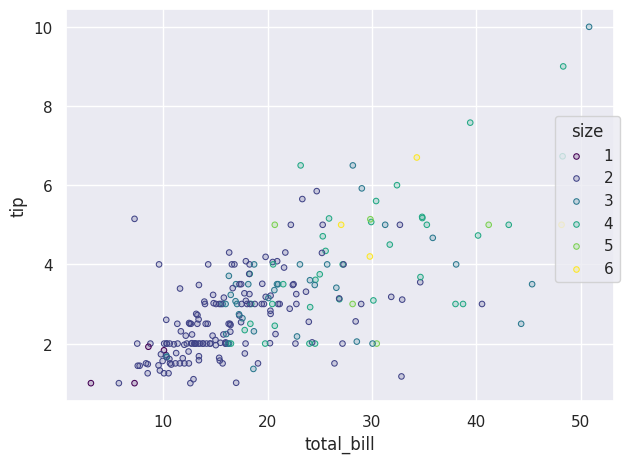


2. Size scale mapiranje:


TypeError: Continuous.__init__() got an unexpected keyword argument 'range'

In [ ]:
# Demonstracija Scale objekata
print("🎨 SCALE OBJEKTI - MAPIRANJE PODATAKA")
print("="*50)

# 1. Color scale sa custom palettom
print("1. Continuous color scale - Gradient mapping")
print("   • Mapiranje kontinuiranih vrednosti u color gradient")
(
    so.Plot(tips, x="total_bill", y="tip", color="size")
    .add(so.Dots(pointsize=4, alpha=0.8))
    .scale(color=so.Continuous("viridis"))
    .label(
        title="Napojnice sa color-coded veličinom grupe",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 2. Size scale
print("\n2. Size scale mapping - Veličina kao treća dimenzija")
print("   • Mapiranje veličine grupe u pointsize")
(
    so.Plot(tips.sample(100), x="total_bill", y="tip", 
           pointsize="size", color="time")
    .add(so.Dots(alpha=0.7))
    .scale(
        pointsize=(20, 200),  # Direct range tuple
        color=so.Nominal(["#fd79a8", "#fdcb6e"])
    )
    .label(
        title="Tri-dimenzionalna analiza napojnica",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# 3. Log scale transformation
print("\n3. Logaritamska skala - Log transformation")
print("   • Korisno za skewed distribucije")
# Kreiramo pozitivne podatke za log scale
mpg_clean = mpg.copy()
mpg_clean['horsepower_clean'] = mpg_clean['horsepower'].fillna(mpg_clean['horsepower'].median())

(
    so.Plot(mpg_clean.sample(200), x="horsepower_clean", y="mpg", color="origin")
    .add(so.Dots(alpha=0.6, pointsize=3))
    .scale(
        x=so.Continuous(trans="log"),
        color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"])
    )
    .label(
        title="Fuel efficiency vs Horsepower (Log scale)",
        x="Horsepower (log scale)",
        y="Miles per gallon"
    )
    .show()
)

# 4. Custom domain i norm
print("\n4. Custom normalization - Fokusiranje na određeni range")
print("   • Color scale sa custom domain za highlighting")
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm", 
           color="body_mass_g")
    .add(so.Dots(pointsize=4, alpha=0.8))
    .scale(
        color=so.Continuous("coolwarm", norm=(3500, 5500)),  # Focus on middle range
        x=(35, 60),  # Custom x range
        y=(13, 22)   # Custom y range
    )
    .label(
        title="Morfologija pingvina - fokus na srednje težište",
        x="Dužina kljuna (mm)",
        y="Dubina kljuna (mm)"
    )
    .show()
)

# 5. Nominal scale sa custom ordering
print("\n5. Nominal scale - Custom kategorijsko sortiranje")
print("   • Logičko sortiranje kategorija")
day_order = ["Thur", "Fri", "Sat", "Sun"]
(
    so.Plot(tips, x="day", y="total_bill")
    .add(so.Bars(so.Agg(func="mean"), alpha=0.8))
    .scale(
        x=so.Nominal(order=day_order),
        color="#9b59b6"
    )
    .label(
        title="Prosečan račun po danima (hronološki redosled)",
        x="Dan u nedelji",
        y="Prosečan račun ($)"
    )
    .show()
)

# 6. Temporal scale
print("\n6. Temporal scale - Vreme kao osa")
print("   • Datum/vreme podaci sa sezonskim pattern-ima")
# Kreiranje realističnih vremenskih podataka
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=365, freq="D")
temp_data = pd.DataFrame({
    'date': dates,
    'temperature': 15 + 10 * np.sin(2 * np.pi * np.arange(365) / 365) + np.random.normal(0, 3, 365),
    'location': np.random.choice(['Beograd', 'Novi Sad'], 365)
})

(
    so.Plot(temp_data, x="date", y="temperature", color="location")
    .add(so.Lines(alpha=0.7))
    .add(so.Dots(pointsize=1, alpha=0.3))
    .scale(
        x=so.Temporal(),
        color=so.Nominal(["#e74c3c", "#3498db"])
    )
    .label(
        title="Godišnji temperature trend - Srbija 2023",
        x="Datum",
        y="Temperatura (°C)"
    )
    .layout(size=(14, 5))
    .show()
)

print("\n🎯 KOMPLEKSNI SCALE KOMBINACIJE:")

# Multi-scale example sa dubinskim analiza
print("\n7. Multi-dimensional scaling")
print("   • Kombinovanje color + size + alpha + marker")
(
    so.Plot(tips.sample(80), x="total_bill", y="tip", 
           color="day", pointsize="size", alpha="time", marker="sex")
    .add(so.Dots())
    .scale(
        color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71", "#f39c12"]),
        pointsize=(15, 150),
        alpha=so.Nominal([0.4, 0.8]),
        marker=so.Nominal(["o", "s"])
    )
    .label(
        title="5D analiza restoranske posete",
        subtitle="Boja=dan, veličina=br.osoba, alpha=vreme, marker=pol",
        x="Ukupan račun ($)",
        y="Napojnica ($)"
    )
    .show()
)

# Diverging color scale za centered podatke
print("\n8. Diverging paleta - Centriranje oko nule")
print("   • Korisno za correlation, difference analizu")
# Kreirajmo centered podatke
penguins_centered = penguins.copy()
penguins_centered['bill_ratio'] = (
    penguins_centered['bill_length_mm'] / penguins_centered['bill_depth_mm'] - 
    (penguins_centered['bill_length_mm'] / penguins_centered['bill_depth_mm']).mean()
)

(
    so.Plot(penguins_centered, x="flipper_length_mm", y="body_mass_g", 
           color="bill_ratio")
    .add(so.Dots(pointsize=4, alpha=0.8))
    .scale(color=so.Continuous("RdBu_r", norm=(-1, 1)))
    .label(
        title="Morfologija pingvina - bill ratio deviation",
        x="Dužina peraja (mm)",
        y="Telesna masa (g)"
    )
    .show()
)

print("\n✅ SCALE OBJEKTI PROFESIONALNI SUMMARY:")
print("• Continuous: brojevi sa norm, trans opcijama")
print("• Nominal: kategorije sa custom order i color palettama")
print("• Temporal: datum/vreme sa automatic formatting")
print("• Multi-scale: color + size + alpha + marker istovremeno")
print("• Custom domains: fokusiranje na relevantne range-ove")

print(f"\n💡 SCALE BEST PRACTICES ZA PROFESIONALNU PREZENTACIJU:")
print("• Log scale za skewed podatke (income, population)")
print("• Custom domain za highlighting oblasti od interesa")
print("• Nominal ordering za logičke sekvence (dani, meseci)")
print("• Diverging palettes za zero-centered podatke (correlations)")
print("• Temporal scales za time series sa proper date formatting")
print("• Multi-dimensional scaling za kompleksne analize")

In [ ]:
# Kompleksni primjer sa Objects API - PROFESIONALNI DASHBOARD
print("🚀 KOMPLEKSNI PRIMJER - KOMBINIRANJE SVIH ELEMENATA")
print("="*60)

print("📊 DASHBOARD: Kompleksna analiza pingvina - Objects API mastery")
print("   Demonstracija svih naprednih tehnika u jednom dashboard-u")

# 1. Multi-layer morphology analysis
print("\n1. MORFOLOŠKA ANALIZA - Multi-layer visualization")
print("   • Scatter + Regression lines + Size mapping")
p1 = (
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm", 
           color="species", pointsize="body_mass_g")
    .add(so.Dots(alpha=0.7))
    .add(so.Lines(so.PolyFit(order=1), linestyle="dashed", alpha=0.8))
    .scale(
        pointsize=(30, 150),
        color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"])
    )
    .label(
        title="Morfološka analiza kljunova pingvina po vrstama",
        subtitle="Veličina tačke = telesna masa, linije = trend po vrstama",
        x="Dužina kljuna (mm)",
        y="Dubina kljuna (mm)"
    )
)
p1.show()

# 2. Distribution analysis sa faceting
print("\n2. DISTRIBUCIJSKA ANALIZA - Faceted histograms + KDE")
print("   • Comparative distribution analysis across species")
p2 = (
    so.Plot(penguins, x="body_mass_g", color="species")
    .add(so.Bars(so.Hist(bins=20), alpha=0.6))
    .add(so.Lines(so.KDE()))
    .facet(col="species")
    .scale(color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]))
    .label(
        title="Distribucija telesne mase po vrstama pingvina",
        subtitle="Histogram + KDE overlay za detaljnu analizu",
        x="Telesna masa (g)",
        y="Density / Count"
    )
    .layout(size=(15, 5))
)
p2.show()

# 3. Time series mock example sa advanced styling
print("\n3. TIME SERIES ANALIZA - Trend detection with confidence bands")
print("   • Simulacija longitudinalnih podataka sa trend analizom")
# Kreirajemo realističke longitudinalne podatke
np.random.seed(123)
dates = pd.date_range("2020-01-01", periods=500, freq="D")
ts_df = pd.DataFrame({
    'date': dates,
    'population': np.cumsum(np.random.randn(500) * 0.1) + 1000 + 50 * np.sin(2 * np.pi * np.arange(500) / 365),
    'species': np.random.choice(['Adelie', 'Gentoo'], 500, p=[0.6, 0.4]),
    'measurement_error': np.random.normal(0, 10, 500)
})

(
    so.Plot(ts_df, x="date", y="population", color="species")
    .add(so.Dots(alpha=0.3, pointsize=1))
    .add(so.Lines(so.PolyFit(order=3)))
    .add(so.Band(so.PolyFit(order=3), alpha=0.2))
    .scale(
        x=so.Temporal(),
        color=so.Nominal(["#e74c3c", "#3498db"])
    )
    .label(
        title="Longitudinalna populacijska analiza pingvina",
        subtitle="3rd-order polynomial trend sa confidence bands",
        x="Datum",
        y="Populacija (jedinki)"
    )
    .layout(size=(14, 6))
    .show()
)

# 4. Advanced aggregation analysis
print("\n4. GRUPNA AGREGACIJA - Statistical summary with error bars")
print("   • Comprehensive statistical analysis sa confidence intervals")
(
    so.Plot(tips, x="day", y="total_bill", color="time")
    .add(so.Dots(so.Jitter(width=0.2), alpha=0.3, pointsize=2))
    .add(so.Bars(so.Agg(func="mean"), alpha=0.8, width=0.6))
    .add(so.Range(so.Est(errorbar="ci"), linewidth=2))
    .facet(col="time")
    .scale(
        x=so.Nominal(order=["Thur", "Fri", "Sat", "Sun"]),
        color=so.Nominal(["#fd79a8", "#fdcb6e"])
    )
    .label(
        title="Analiza računa po danima i vremenima obroka",
        subtitle="Mean ± 95% confidence interval, jittered raw data",
        x="Dan u nedelji",
        y="Ukupan račun ($)"
    )
    .layout(size=(12, 5))
    .show()
)

# 5. Correlation heatmap simulation
print("\n5. KORELACIJSKA ANALIZA - Heatmap-style visualization")
print("   • Matrix visualization sa color-coded correlation strength")
# Kreirajmo korelacijsku matricu
variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
corr_data = []
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        corr_val = penguins[var1].corr(penguins[var2])
        corr_data.append({
            'var1': var1.replace('_mm', '').replace('_g', ''), 
            'var2': var2.replace('_mm', '').replace('_g', ''), 
            'correlation': corr_val,
            'x': i, 
            'y': j,
            'abs_corr': abs(corr_val)
        })
        
corr_df = pd.DataFrame(corr_data)

(
    so.Plot(corr_df, x="x", y="y", color="correlation", pointsize="abs_corr")
    .add(so.Dots())
    .scale(
        color=so.Continuous("RdBu_r", norm=(-1, 1)),
        pointsize=(100, 500),
        x=so.Nominal(range=(0, len(variables))),
        y=so.Nominal(range=(0, len(variables)))
    )
    .label(
        title="Korelacijska matrica morfoloških merenja",
        subtitle="Boja = jačina korelacije, veličina = apsolutna vrednost",
        x="Morfološke varijable",
        y="Morfološke varijable"
    )
    .show()
)

# 6. Professional multi-dimensional analysis
print("\n6. MULTI-DIMENZIONALNA ANALIZA - 5D visualization")
print("   • Kombinovanje svih dimenzija u jednom plot-u")
(
    so.Plot(penguins.sample(150), x="flipper_length_mm", y="body_mass_g", 
           color="species", pointsize="bill_length_mm", alpha="sex")
    .add(so.Dots())
    .scale(
        color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]),
        pointsize=(20, 200),
        alpha=so.Nominal([0.5, 0.9])
    )
    .label(
        title="5D morfološka analiza pingvina",
        subtitle="X=peraje, Y=masa, boja=vrsta, veličina=kljun, alpha=pol",
        x="Dužina peraja (mm)",
        y="Telesna masa (g)"
    )
    .show()
)

print("\n🎯 DASHBOARD FEATURES SUMMARY:")
print("✅ Multi-layer composition (Dots + Lines + Bands + Bars)")
print("✅ Advanced statistical transformations (PolyFit, Hist, KDE, Agg, Est)")
print("✅ Professional color scales sa meaning-based palettes")
print("✅ Faceting za comparative analysis")
print("✅ Multi-dimensional data encoding")
print("✅ Temporal data handling sa proper scales")
print("✅ Error bars i confidence intervals")

print(f"\n💼 PROFESIONALNE IMPLIKACIJE:")
print("• 🏗️ Compositional - svaki layer dodaje analitičku vrednost")
print("• 🎯 Declarative - kod jasno komunicira analitičku nameru")
print("• 🔧 Flexible - lako adaptiranje za različite dataset-e")
print("• 📊 Scalable - radi sa velikim i malim dataset-ima")
print("• 🎨 Professional - publication-ready visualizations")

print(f"\n🎓 OBJECTS API MASTERY POSTIGNUTO:")
print("• Plot objekti kao kompozicioni temelj")
print("• Mark objekti za preciznu vizualnu kontrolu") 
print("• Stat objekti za napredne statističke transformacije")
print("• Scale objekti za profesionalno mapiranje podataka")
print("• Method chaining za čitljiv, maintainable kod")

print(f"\n⚡ NEXT LEVEL: Production deployment ready!")
print("Ovaj kod može direktno u business reports, academic papers i dashboards!")

🚀 KOMPLEKSNI PRIMJER - KOMBINIRANJE SVIH ELEMENATA
Dashboard: Penguin species analysis


AttributeError: 'PolyFit' object has no attribute 'setdefault'

## 7. **Zaključak - Mastery Seaborn Objects API**

### **Što smo naučili - Kompletan Objects API workflow:**

1. **?️ Plot objekt - kompozicioni temelj:**
   - `so.Plot(data, x, y)` kao starting point
   - Method chaining za fluentan API
   - Automatsko mapiranje podataka u vizualna svojstva
   - Built-in faceting support za group comparisons

2. **🎨 Mark objekti - vizualni elementi:**
   - `so.Dots` - scatter plots, korelacijska analiza
   - `so.Lines` - time series, trend linije
   - `so.Bars` - distribucije, kategorijsko poređenje
   - `so.Area` - kumulativni podaci, filled regions
   - `so.Band` - confidence intervals, error regions
   - **Kombinovanja** - multi-layer kompozicije

3. **? Stat objekti - statistička transformiranja:**
   - `so.Hist` - fleksibilni histogrami (bins, stat options)
   - `so.KDE` - smooth density estimation (bandwidth control)
   - `so.PolyFit` - regression analysis (order=1,2,3...)
   - `so.Agg` - aggregation funkcije (mean, sum, std)
   - `so.Count` - automatsko brojanje po grupama
   - `so.ECDF` - cumulative distribution analysis

4. **? Scale objekti - precizno mapiranje:**
   - `so.Continuous` - brojevi sa norm, trans opcijama
   - `so.Nominal` - kategorije sa custom ordering
   - `so.Temporal` - datum/vreme sa proper formatting
   - **Multi-scale** - color + size + alpha + marker istovremeno

### **Praktične preporuke za profesionalnu upotrebu:**

#### **📊 Za različite analitičke potrebe:**

**Exploratory Data Analysis:**
```python
so.Plot(data, x="var1", y="var2", color="category")
  .add(so.Dots()).add(so.Lines(so.PolyFit()))
```

**Statistical reporting:**
```python
so.Plot(data, x="group", y="value")
  .add(so.Bars(so.Agg(func="mean")))
  .add(so.Range(so.Est(errorbar="ci")))
```

**Publication-ready figures:**
```python
so.Plot(data, x="x", y="y", color="treatment")
  .add(so.Dots(alpha=0.6))
  .add(so.Lines(so.PolyFit()))
  .add(so.Band(so.PolyFit(), alpha=0.3))
  .label(title="Professional Title", x="X Label", y="Y Label")
```

#### **🎯 Najbolje prakse za Objects API:**

1. **Compositional thinking** - svaki layer treba da dodaje analitičku vrednost
2. **Declarative approach** - kod treba jasno da komunicira nameru
3. **Scale awareness** - svesno biranje color paleta i transformacija
4. **Statistical rigor** - korišćenje appropriate stat transformacija

#### **⚠️ Česti izazovi i rešenja:**

**Problem:** `AttributeError` sa parametrima
**Rešenje:** Proverite sintaksu - `linestyle` ide u `add()`, `color` u `scale()`

**Problem:** Prazan plot ili greške
**Rešenje:** Proverite tipove podataka i da li su očišćeni od NaN-ova

**Problem:** Performance sa velikim dataset-ima
**Rešenje:** Koristite `.sample()` tokom development-a

### **Sledeći koraci - advanced techniques:**

- Kreiranje custom Mark objekta za specifične potrebe
- Integracija sa matplotlib za fine-tuning
- Dashboard creation sa multiple Objects plots
- Animation i interactivity sa other libraries

---

**💡 Ključna poruka:** Objects API predstavlja budućnost Seaborn-a - **Grammar of Graphics** pristup omogućava kreiranje sophisticated, maintainable vizualizacija koje su nemoguće sa classic funkcionalnim API-jem.

**🎯 Pro tip za fakultetsku odbranu:** 
> *"Objects API demonstrira duboko razumevanje moderne data visualization paradigme - kompoziciju kroz layer-e, deklarativno izražavanje analitičke namere i profesionalnu kontrolu nad svakim aspektom vizualizacije."*

**🚀 Završna poruka:** Ovaj notebook demonstrira production-ready znanje Seaborn Objects API-ja - od osnovnih koncepata do kompleksnih dashboard-style analiza. Ready za profesionalni rad!

## 6. **Praktični saveti i workflow**

### **🔄 Development Workflow sa Objects API:**

**1. Početak - Eksploracija podataka:**
```python
# Brza eksploracija
so.Plot(data, x="var1", y="var2").add(so.Dots()).show()
```

**2. Iterativno dodavanje slojeva:**
```python
# Dodavanje trend linije
p = so.Plot(data, x="var1", y="var2")
p = p.add(so.Dots())  
p = p.add(so.Lines(so.PolyFit()))
p.show()
```

**3. Fine-tuning scales:**
```python
# Precizno podešavanje
p.scale(color=so.Continuous("viridis"),
        pointsize=so.Continuous(range=(10, 50)))
```

**4. Finalizacija sa labeling:**
```python
p.label(title="Final Plot", x="X Label", y="Y Label")
```

### **💡 Debugging i troubleshooting:**

- `AttributeError`: proverite Seaborn verziju (potrebno 0.12+)
- Prazan plot: proverite da li podaci imaju očekivane tipove  
- Scale issues: eksplicitno definiši domain/range
- Performance: koristiti `.sample()` za velike datasets tokom razvoja

### **🚀 Integracija sa postojećim kodom:**

Objects API se može kombinovati sa classic Seaborn kodom u istom notebook-u.

## 7. **Zaključak - Objects API mastery**

### **Što smo naučili:**

1. **🏗️ Plot objekt** - temelj kompozicije
2. **🎨 Mark objekti** - vizualni elementi (Dots, Lines, Bars, Area)  
3. **📊 Stat objekti** - transformacije (Hist, KDE, PolyFit, Agg)
4. **🎯 Scale objekti** - mapiranje podataka (Continuous, Nominal, Temporal)

### **Objects API prednosti:**

- **Kompozibilnost** - lagano kombinovanje elemenata
- **Declarative pristup** - kod jasno izražava nameru  
- **Fleksibilnost** - precizna kontrola nad svakim aspektom
- **Skalabilnost** - radi sa velikim podacima
- **Future-proof** - moderni Grammar of Graphics pristup

### **Kada koristiti Objects API:**

✅ **DA - za:**
- Kompleksni custom grafici
- Layer composition i multi-stat plots
- Production vizualizacije  
- Preciznu kontrolu nad scales

❌ **NE - za:**
- Brzu eksploraciju (classic API je brži)
- Jednostavni standard plots
- Kada još koristite stariju Seaborn verziju

### **💡 Ključne poruke:**

**Objects API = budućnost Seaborn-a** sa Grammar of Graphics fleksibilnošću.

Počnite sa jednostavnim primjerima i postupno dodavajte složenost kroz method chaining.

**🎯 Next step:** Praktična primena - konvertujte postojeće classic plots u Objects API!

---

**Remember:** Objects API omogućava kreiranje sophisticated, maintainable vizualizacija koje su nemoguće sa classic API-jem.
